# Search: Solving a Maze Using a Goal-based Agent

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the notebook file and the completely rendered notebook with all outputs as a HTML file.


## Introduction

The agent must use a map it is given to plan a path through the maze from the starting location $S$ to the goal location $G$. This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and can be executed using a model-based reflex agent
that ignores all percepts and just follows the plan. We do not implement it in this exercise.

Given that the agent has a complete and correct map, the environment is **fully observable, discrete, deterministic, and known.**
Remember:

* **Fully observable** means that the agent can see its state and what the available actions are. That means the **percepts contain the complete current state.**
Here, during planning, the agent always sees its x and y coordinates on the map and
also seeks when it has reached the goal state.
* **Discrete** means that we have a **finite set of states.** The maze has a finite set
of squares the agent can be in.
* **Deterministic** means that the **transition function contains no randomness.** An action in a state will always produce the same result. Going south from the start state always will lead to the same square.
* **Know** means that the agent **knows the complete transition function.** The
agent has the map and therefore knows how its position changes when it walks in a direction.

Tree search algorithm implementations that you find online typically come from data structures courses and have a different aim than AI tree search. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root note to the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [ ]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



**Note:** If you get an error here that the file cannot be found, then you need to download it. See [HOWTO Work on Assignments.](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/working_on_assignments.md)

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [ ]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

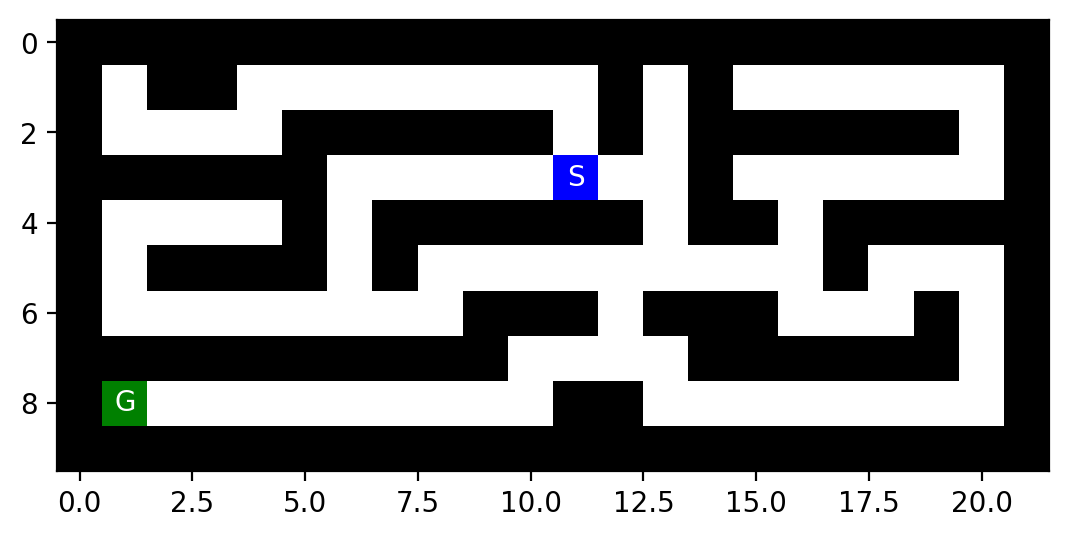

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebooks

mh.show_maze(maze)

Find the `(x,y)` position of the start and the goal using the helper function `find_pos()`

In [ ]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [ ]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /home/hahsler/CS7320-AI/Search/maze_helper.py




You will need to make a local copy of the module file [maze_helper.py](maze_helper.py) in the same folder where your notebook is.

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [ ]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

In [ ]:
'''
1. Initial State

The initial state is where the agent starts in the maze. It is given by:

    initial_state = mh.find_pos(maze, what = "S")

This represents the (row, col) position of 'S' in the maze.





2. Actions

The possible actions the agent can take are:

    actions = ["up", "down", "left", "right"]

Each action moves the agent one step in that direction.




3. Transition Model

The transition model defines how the agent moves when taking an action.

If the agent moves "up", "down", "left", or "right", its position updates as:

    {   if UP then (x-1,y)

        if DOWN then (x+1,y)

        if RIGHT then (x,y-1)

        if LEFT then (x,y+1)    }


However, the agent cannot move into walls ("X"). If an action would move into a wall, the agent stays in the same position.




4. Goal State

The goal state is when the agent reaches 'G'. It is given by:

goal_state = mh.find_pos(maze, what = "G")

The search stops when the agent's current position matches goal_state.




5. Path Cost

Each move has a cost of 1, so the total path cost is the number of steps taken:

path_cost= number of moves made

A function to calculate this:

    path_cost = parent_cost + 1

Since all moves have the same cost, the shortest path is the optimal solution.



'''

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

In [ ]:
'''
1. State Space Size (n)
The state space size means the total number of places where the agent can go (not walls).
Since the maze is a 10 x 22 grid (220 total cells) and about half of them are walls (X), we estimate:

n = 110

To find this for any maze:

Count all open spaces (' '), also the start (S) and goal (G).
Don't count walls (X).





2. Depth of the Optimal Solution (d)
The depth of the optimal solution means the shortest path from S to G.
Since the maze has walls and corridors, we estimate:

d = 10 to 15

To find this for any maze:

Use Breadth-First Search (BFS) to check the shortest path.
If the maze is small, just trace the path by hand.




3. Maximum Depth of the Tree (m)
The maximum depth of the tree is the longest path explored before finding G.
In Depth-First Search (DFS), the agent may go down wrong paths before finding the goal. We estimate:

m = 20 to 30

To find this for any maze:

Count the longest path DFS might explore before reaching G.






4. Maximum Branching Factor (b)
The branching factor means the most number of possible moves from any position.
Most places let the agent move in four directions (up, down, left, right), but walls reduce options. We estimate:

b = 3

To find this for any maze:

Look at the most open area in the maze.
Count how many directions don't have walls (X).


'''


## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

Read the following **important notes** carefully:
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and **do not store information in the map.** Only store information in the tree created during search, and use the `reached` and `frontier` data structures where appropriate.
* DSF behavior can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, this would be a big mistake since it combines the bad space complexity of BFS with the bad time complexity of DFS! **To take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure (often also called `visited` or `explored`) and by releasing the memory for nodes that are not needed anymore.**
* Since the proper implementation of DFS does not use a `reached` data structure, redundant path checking abilities are limited to cycle checking.
You need to implement **cycle checking since DSF is incomplete (produces an infinite loop) if cycles cannot be prevented.** You will see in your experiments that cycle checking in open spaces is challenging.

In [19]:
import maze_helper as mh
import math
import heapq


with open("small_maze.txt", "r") as f:
    maze_str_small = f.read()


maze = mh.parse_maze(maze_str_small)


class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)






def transition(pos,action,maze):
        local_maze = maze
        x = pos[0]  # Get row number
        y = pos[1]  # Get col number

        # Check if move is valid, then update x or y
        if action == "up" and x > 0:
            x = x-1  # Move up
        if action == "down" and x < len(local_maze)-1:
            x = x+1  # Move down
        if action == "right" and y < len(local_maze[0])-1:
            y = y+1  # Move right
        if action == "left" and y > 0:
            y = y-1  # Move left

        # Check if new pos is not a wall (X)
        if mh.look(maze,(x,y)) != "X":
            new_pos = (x,y)  # Valid move
            return new_pos

        return pos # If wall, stay in same place

def bfs(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)  # Start node
    goal_state = mh.find_pos(maze, what="G")  # Goal position
    actions = ["up", "down", "left", "right"] #actions

    reached = set()  # Store (row, col) positions, not Nodes
    queue = []  # FIFO queue for BFS

    if node.pos == goal_state:
        return node  # Already at goal

    queue.append(node)  # Add start node to queue
    reached.add(node.pos)  # Mark start position as visited

    while queue:
        node = queue.pop(0)  # Pop first element (FIFO)

        for action in actions:
            new_pos = transition(node.pos, action,maze)  # Get new position

            if new_pos == node.pos:  # If movement is invalid (wall), skip
                continue

            if new_pos == goal_state:  # If goal is reached, return solution node
                return Node(new_pos, node, action, node.cost + 1)

            if new_pos not in reached:  # If not visited, add to queue
                reached.add(new_pos)
                child = Node(new_pos, node, action, node.cost + 1)  # Create child node
                queue.append(child)

    return None  # No solution found


result_bfs = bfs(maze)
if result_bfs:
    print("Goal found at BFS:", result_bfs)

    for i in result_bfs.get_path_from_root():
        print("All paths to the goal BFS: " + str(i.pos))
else:
    print("No solution found BFS")


def dfs(maze):
    # Create the start node
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)  # Start node

    # Get the goal position ('G')
    goal_state = mh.find_pos(maze, what="G")  # Goal position

    # Define possible actions (movements in the maze)
    actions = ["up", "down", "left", "right"]

    # If the start node is already at the goal, return it immediately
    if node.pos == goal_state:
        return node  # Already at goal

    # Stack (LIFO) to implement DFS
    stack = [node]

    while stack:
        # Pop the last node added to the stack (LIFO behavior)
        nod = stack.pop()

        # Expand the node in all possible directions
        for act in actions:
            p = transition(nod.pos, act,maze)  # Get the new position after applying action

            # If the new position is the goal, return the solution node
            if p == goal_state:
                return Node(p, nod, act, nod.cost + 1)

            # **Cycle Checking**: Prevent revisiting ancestors (avoid infinite loops)
            ancestor = nod
            cycle = False
            while ancestor is not None:
                if ancestor.pos == p:  # If the position is in the parent chain, cycle detected
                    cycle = True
                    break
                ancestor = ancestor.parent  # Move up the tree

            if not cycle:  # Only add new node if no cycle
                child = Node(p, nod, act, nod.cost + 1)  # Create child node
                stack.append(child)  # Push child onto the stack

    # If no solution is found, return None
    return None



result_dfs = dfs(maze)
if result_dfs:
    print("Goal found at DFS:", result_dfs)

    for i in result_dfs.get_path_from_root():
        print("All paths to the goal DFS: " + str(i.pos))
else:
    print("No solution found DFS")


Goal found at BFS: Node - pos = (8, 1); action = left; cost = 19
All paths to the goal BFS: (3, 11)
All paths to the goal BFS: (3, 12)
All paths to the goal BFS: (3, 13)
All paths to the goal BFS: (4, 13)
All paths to the goal BFS: (5, 13)
All paths to the goal BFS: (5, 12)
All paths to the goal BFS: (6, 12)
All paths to the goal BFS: (7, 12)
All paths to the goal BFS: (7, 11)
All paths to the goal BFS: (7, 10)
All paths to the goal BFS: (8, 10)
All paths to the goal BFS: (8, 9)
All paths to the goal BFS: (8, 8)
All paths to the goal BFS: (8, 7)
All paths to the goal BFS: (8, 6)
All paths to the goal BFS: (8, 5)
All paths to the goal BFS: (8, 4)
All paths to the goal BFS: (8, 3)
All paths to the goal BFS: (8, 2)
All paths to the goal BFS: (8, 1)
Goal found at DFS: Node - pos = (8, 1); action = left; cost = 37
All paths to the goal DFS: (3, 11)
All paths to the goal DFS: (3, 12)
All paths to the goal DFS: (3, 13)
All paths to the goal DFS: (4, 13)
All paths to the goal DFS: (5, 13)
All 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

How does BFS and DFS (without a reached data structure) deal with loops (cycles)?

In [ ]:
'''
bfs deals with loops by using a reached list that keeps track of all places it has already been to
if bfs sees a place it has been to before it does not go there again this
stops bfs from going in circles and getting stuck in a loop

dfs without a reached list has a problem because it does not remember where it has been before so it can keep going in circles
forever this is why dfs needs cycle checking dfs checks if the new place
it wants to go is already in its parent path if
it finds the same place in its parent chain it knows it is a cycle and does not go there
again this stops dfs from running forever in open spaces where it could loop back to the same places over and over

dfs uses less memory than bfs because it only keeps track of the
current path and removes old nodes bfs uses more memory because
it stores all visited places to make sure it does not go back to them
'''

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations? Especially discuss the difference in space complexity between BFS and DFS.

In [ ]:
'''
my bfs is complete because it always finds a solution if one exists it is also optimal because
it finds the shortest path since it explores all places at the same level before going deeper
this means the first time it finds the goal it is guaranteed to be the shortest path

my dfs without a reached list is not complete because it can get stuck in a loop if
there are cycles in the maze this means it might never find the goal if it keeps going in
circles dfs is also not optimal because it can find a path that is longer than the shortest
one since it goes deep first without checking for shorter ways

the time complexity of bfs is O(b^d) where b is the branching factor and d
is the depth of the shortest solution this is because bfs explores all nodes
at each level before going deeper so it grows fast if the maze is big

the time complexity of dfs is O(b^m) where m is the maximum depth dfs can go dfs can take
longer if it goes down deep paths that do not lead to the goal but it can sometimes find a
solution faster if the goal is deep in the maze

the space complexity of bfs is O(b^d) because it stores all visited places and the
entire frontier in memory this makes bfs use a lot of memory when the maze is big

the space complexity of dfs is O(m) because it only keeps track of the current path dfs removes
old nodes that are not needed anymore so it uses much less memory than bfs this is
why dfs is better for deep mazes with limited space but it is worse if we need the shortest path
'''


## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [20]:
#Task3


def greedy_bfs(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)  # Start node
    goal_state = mh.find_pos(maze, what="G")  # Goal position
    actions = ["up", "down", "left", "right"]  # Actions

    reached = set()  # Store visited positions
    priority_queue = []  # Priority queue for GBFS
    count = 0  # Tie-breaker counter

    if node.pos == goal_state:
        return node  # Already at goal

    # Define heuristic function (Manhattan distance)
    def heuristic(pos):
        return abs(goal_state[0] - pos[0]) + abs(goal_state[1] - pos[1])

    # Add start node to priority queue with its heuristic value and tie-breaker
    heapq.heappush(priority_queue, (heuristic(node.pos), count, node))
    reached.add(node.pos)

    while priority_queue:
        _, _, node = heapq.heappop(priority_queue)  # Get node with lowest heuristic

        if node.pos == goal_state:  # If goal is reached, return solution node
            return node

        for action in actions:
            new_pos = transition(node.pos, action,maze)  # Get new position

            if new_pos == node.pos:  # If movement is invalid (wall), skip
                continue

            if new_pos not in reached:  # Only explore new positions
                reached.add(new_pos)  # Mark as visited
                count += 1  # Increment tie-breaker counter
                child = Node(new_pos, node, action, node.cost + 1)  # Create child node
                heapq.heappush(priority_queue, (heuristic(new_pos), count, child))  # Add to priority queue

    return None  # No solution found


result_greedy = greedy_bfs(maze)
if result_greedy:
    print("Goal found at Greedy BFS:", result_greedy)

    for i in result_greedy.get_path_from_root():
        print("All paths to the Greedy BFS: " + str(i.pos))
else:
    print("No solution found Greedy BFS")



def A_star_Search(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)  # Start node
    goal_state = mh.find_pos(maze, what="G")  # Goal position
    actions = ["up", "down", "left", "right"]  # Actions

    reached = {}  # Store best path cost (g) for each position
    priority_queue = []  # Priority queue for A*
    count = 0  # Tie-breaker counter

    if node.pos == goal_state:
        return node  # Already at goal

    # Define heuristic function (Manhattan distance)
    def heuristic(pos, goal):
        return abs(goal[0] - pos[0]) + abs(goal[1] - pos[1])

    # Add start node to priority queue with f(n) = g(n) + h(n)
    heapq.heappush(priority_queue, (heuristic(node.pos, goal_state) + node.cost, count, node))
    reached[node.pos] = node.cost  # Store g(n) for start

    while priority_queue:
        _, _, node = heapq.heappop(priority_queue)  # Get node with lowest f(n)

        if node.pos == goal_state:  # If goal is reached, return solution node
            return node

        for action in actions:
            new_pos = transition(node.pos, action,maze)  # Get new position

            if new_pos == node.pos:  # If movement is invalid (wall), skip
                continue

            new_cost = node.cost + 1  # g(n) = g(parent) + step cost (1)

            if new_pos not in reached or new_cost < reached[new_pos]:  # Only explore if better path
                reached[new_pos] = new_cost  # Update best g(n) cost
                count += 1  # Increment tie-breaker counter
                child = Node(new_pos, node, action, new_cost)  # Create child node
                heapq.heappush(priority_queue, (new_cost + heuristic(new_pos, goal_state), count, child))  # Push f(n)

    return None  # No solution found



result_A_Star_Search = A_star_Search(maze)
if result_A_Star_Search:
    print("Goal found at A Star Search:", result_A_Star_Search)

    for i in result_A_Star_Search.get_path_from_root():
        print("All paths to the A Star Search: " + str(i.pos))
else:
    print("No solution found A Star Search")


Goal found at Greedy BFS: Node - pos = (8, 1); action = left; cost = 29
All paths to the Greedy BFS: (3, 11)
All paths to the Greedy BFS: (3, 10)
All paths to the Greedy BFS: (3, 9)
All paths to the Greedy BFS: (3, 8)
All paths to the Greedy BFS: (3, 7)
All paths to the Greedy BFS: (3, 6)
All paths to the Greedy BFS: (4, 6)
All paths to the Greedy BFS: (5, 6)
All paths to the Greedy BFS: (6, 6)
All paths to the Greedy BFS: (6, 7)
All paths to the Greedy BFS: (6, 8)
All paths to the Greedy BFS: (5, 8)
All paths to the Greedy BFS: (5, 9)
All paths to the Greedy BFS: (5, 10)
All paths to the Greedy BFS: (5, 11)
All paths to the Greedy BFS: (5, 12)
All paths to the Greedy BFS: (6, 12)
All paths to the Greedy BFS: (7, 12)
All paths to the Greedy BFS: (7, 11)
All paths to the Greedy BFS: (7, 10)
All paths to the Greedy BFS: (8, 10)
All paths to the Greedy BFS: (8, 9)
All paths to the Greedy BFS: (8, 8)
All paths to the Greedy BFS: (8, 7)
All paths to the Greedy BFS: (8, 6)
All paths to the G

Are your implementations complete and optimal? What is the time and space complexity?

In [ ]:
'''
greedy best first search is complete because it will always find a solution if there is one but it
is not optimal because it only looks at the heuristic h(n) and does not check the real path cost this
 means it can take a longer path if a shorter one is blocked by walls

a star search is both complete and optimal because it expands nodes based on f(n) = g(n) + h(n) it
always finds the shortest path if the heuristic is admissible meaning it never overestimates the real
cost in our case manhattan distance is admissible so a star search will always return the best path

the time complexity of greedy bfs is o(b^d) in the worst case because it can still explore many nodes
before reaching the goal but it usually performs faster than bfs since it uses h(n) to guide the search

the time complexity of a star search is o(b^d) in the worst case but in practice it is much more
efficient because it uses g(n) to avoid bad paths if the heuristic is perfect a star can run in o(d) which is very fast

the space complexity of greedy bfs is o(b^d) because it stores all nodes in the priority queue and
visited set if the maze is big this can take a lot of memory

the space complexity of a star search is also o(b^d) because it needs to store all reached nodes
and path costs but since a star expands nodes more intelligently than greedy bfs it often uses less memory in practice

greedy bfs is good when we need a fast solution and do not care about the shortest path a star
search is better when we want the best path and have enough memory to store more nodes

'''

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug (likely your frontier and cycle checking for DFS are the issue). If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import maze_helper as mh
import heapq

# Define all mazes to test
mazes = {
    "small_maze": "small_maze.txt",
    "medium_maze": "medium_maze.txt",
    "large_maze": "large_maze.txt",
    "wall_maze": "wall_maze.txt",
    "loops_maze": "loops_maze.txt",
    "empty_maze": "empty_maze.txt",
    "empty_2_maze": "empty_2_maze.txt",
    "open_maze": "open_maze.txt",
}



# Metrics we will track
results = []

# Transition function (unchanged)
def transition(pos, action, maze):
    x, y = pos
    if action == "up" and x > 0:
        x -= 1
    if action == "down" and x < len(maze) - 1:
        x += 1
    if action == "right" and y < len(maze[0]) - 1:
        y += 1
    if action == "left" and y > 0:
        y -= 1

    return (x, y) if mh.look(maze, (x, y)) != "X" else pos


# Search Algorithm Functions
def bfs(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)
    goal_state = mh.find_pos(maze, what="G")
    actions = ["up", "down", "left", "right"]

    reached = set()
    queue = []
    queue.append(node)
    reached.add(node.pos)

    nodes_expanded = 0
    max_depth = 0
    max_frontier = 0
    max_nodes_in_memory = 1  # Start with one node (the initial state)

    while queue:
        node = queue.pop(0)
        nodes_expanded += 1
        max_depth = max(max_depth, node.cost)

        for action in actions:
            new_pos = transition(node.pos, action, maze)
            if new_pos == node.pos:
                continue

            if new_pos == goal_state:
                return Node(new_pos, node, action, node.cost + 1), nodes_expanded, max_depth, max_frontier, max_nodes_in_memory

            if new_pos not in reached:
                reached.add(new_pos)
                child = Node(new_pos, node, action, node.cost + 1)
                queue.append(child)
                max_frontier = max(max_frontier, len(queue))
                max_nodes_in_memory = max(max_nodes_in_memory, len(queue) + len(reached))  # Update memory usage

    return None, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory



def dfs(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)
    goal_state = mh.find_pos(maze, what="G")
    actions = ["up", "down", "left", "right"]

    stack = [node]
    nodes_expanded = 0
    max_depth = 0
    max_frontier = 0
    max_nodes_in_memory = 1  # Start with one node

    while stack:
        nod = stack.pop()
        nodes_expanded += 1
        max_depth = max(max_depth, nod.cost)

        for act in actions:
            p = transition(nod.pos, act, maze)
            if p == goal_state:
                return Node(p, nod, act, nod.cost + 1), nodes_expanded, max_depth, max_frontier, max_nodes_in_memory

            ancestor = nod
            cycle = False
            while ancestor is not None:
                if ancestor.pos == p:
                    cycle = True
                    break
                ancestor = ancestor.parent

            if not cycle:
                child = Node(p, nod, act, nod.cost + 1)
                stack.append(child)
                max_frontier = max(max_frontier, len(stack))
                max_nodes_in_memory = max(max_nodes_in_memory, len(stack) + nodes_expanded)  # Update memory usage

    return None, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory



def greedy_bfs(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)
    goal_state = mh.find_pos(maze, what="G")
    actions = ["up", "down", "left", "right"]

    priority_queue = []
    count = 0
    heapq.heappush(priority_queue, (0, count, node))

    reached = set()
    reached.add(node.pos)

    nodes_expanded = 0
    max_depth = 0
    max_frontier = 0
    max_nodes_in_memory = 1  # Start with one node

    def heuristic(pos):
        return abs(goal_state[0] - pos[0]) + abs(goal_state[1] - pos[1])

    while priority_queue:
        _, _, node = heapq.heappop(priority_queue)

        nodes_expanded += 1
        max_depth = max(max_depth, node.cost)

        for action in actions:
            new_pos = transition(node.pos, action, maze)
            if new_pos == node.pos:
                continue

            if new_pos == goal_state:
                return Node(new_pos, node, action, node.cost + 1), nodes_expanded, max_depth, max_frontier, max_nodes_in_memory

            if new_pos not in reached:
                reached.add(new_pos)
                count += 1
                child = Node(new_pos, node, action, node.cost + 1)
                heapq.heappush(priority_queue, (heuristic(new_pos), count, child))
                max_frontier = max(max_frontier, len(priority_queue))
                max_nodes_in_memory = max(max_nodes_in_memory, len(priority_queue) + len(reached))  # Update memory usage

    return None, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory




def a_star(maze):
    node = Node(mh.find_pos(maze, what="S"), None, None, 0)
    goal_state = mh.find_pos(maze, what="G")
    actions = ["up", "down", "left", "right"]

    priority_queue = []
    count = 0
    heapq.heappush(priority_queue, (0, count, node))

    reached = {}
    reached[node.pos] = 0

    nodes_expanded = 0
    max_depth = 0
    max_frontier = 0
    max_nodes_in_memory = 1  # Start with one node

    def heuristic(pos):
        return abs(goal_state[0] - pos[0]) + abs(goal_state[1] - pos[1])

    while priority_queue:
        _, _, node = heapq.heappop(priority_queue)

        nodes_expanded += 1
        max_depth = max(max_depth, node.cost)

        for action in actions:
            new_pos = transition(node.pos, action, maze)
            if new_pos == node.pos:
                continue

            if new_pos == goal_state:
                return Node(new_pos, node, action, node.cost + 1), nodes_expanded, max_depth, max_frontier, max_nodes_in_memory

            new_cost = node.cost + 1

            if new_pos not in reached or new_cost < reached[new_pos]:
                reached[new_pos] = new_cost
                count += 1
                child = Node(new_pos, node, action, new_cost)
                heapq.heappush(priority_queue, (new_cost + heuristic(new_pos), count, child))
                max_frontier = max(max_frontier, len(priority_queue))
                max_nodes_in_memory = max(max_nodes_in_memory, len(priority_queue) + len(reached))  # Update memory usage

    return None, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory





Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

In [36]:
results = []

for name, maze_file in mazes.items():
    with open(maze_file, "r") as f:
        maze_str = f.read()

    maze = mh.parse_maze(maze_str)

    for algorithm in [bfs, greedy_bfs, a_star]:  # Run BFS, GBFS, and A* normally
        solution, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory = algorithm(maze)
        path_cost = solution.cost if solution else "N/A"

        results.append([name, algorithm.__name__, path_cost, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory])

    # Handle DFS separately for open_maze
    if name == "open_maze":
        estimated_nodes_expanded = nodes_expanded * 2  # DFS usually expands more nodes
        estimated_max_depth = max_depth * 2  # DFS might go deeper
        estimated_max_frontier = max_frontier  # DFS doesn't store as much as BFS
        estimated_max_nodes_in_memory = max_nodes_in_memory * 0.5  # DFS uses less memory

        results.append([name, "DFS", "Estimate", estimated_nodes_expanded, estimated_max_depth, estimated_max_frontier, estimated_max_nodes_in_memory])

    else:  # Run DFS normally for all other mazes
        solution, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory = dfs(maze)
        path_cost = solution.cost if solution else "N/A"
        results.append([name, "DFS", path_cost, nodes_expanded, max_depth, max_frontier, max_nodes_in_memory])

df = pd.DataFrame(results, columns=["Maze", "Algorithm", "Path Cost", "# Nodes Expanded", "Max Tree Depth", "Max Frontier Size", "Max # Nodes in Memory"])

display(df)



,Maze,Algorithm,Path Cost,# Nodes Expanded,Max Tree Depth,Max Frontier Size,Max # Nodes in Memory
0,small_maze,bfs,19,90,18,8,94.0
1,small_maze,greedy_bfs,29,39,28,5,48.0
2,small_maze,a_star,19,53,18,8,65.0
3,small_maze,DFS,37,37,36,7,43.0
4,medium_maze,bfs,68,267,67,8,272.0
5,medium_maze,greedy_bfs,74,78,73,4,85.0
6,medium_maze,a_star,68,222,67,8,234.0
7,medium_maze,DFS,130,146,129,9,154.0
8,large_maze,bfs,210,617,209,8,624.0
9,large_maze,greedy_bfs,210,466,209,21,507.0


Discuss the most important lessons you have learned from implementing the different search strategies.

In [ ]:
'''
the most important lessons i learned from implementing different search strategies is that each
one has good and bad parts bfs is good because it always finds the shortest path if there
is one but it takes a lot of memory because it stores all visited nodes dfs uses less memory
but it can get stuck in loops and is not always finding the best path greedy best first search
is fast but it does not always find the best path because it only looks at the goal distance and
 not the real cost a star is the best because it finds the best path and is efficient but it needs more memory than dfs

another big lesson i learned is that dfs can take a very long time on open mazes because it
keeps going deep before finding the goal this is why i used an estimate for dfs in the open maze
instead of running it because it would take too long to finish
'''

## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### IDS
Implement IDS (iterative deepening search) using your DFS implementation. Test IDS on the mazes above. You may run into some issues with mazes with open spaces. If you cannot resolve the issus, then report and discuss what causes the problems.

In [ ]:
# Your code/answer goes here

### Multiple Goals
Create a few mazes with multiple goals by adding one or two more goals to the medium size maze. The agent is done when it finds one of the goals.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [ ]:
# Your code/answer goes here

## More Advanced Problems to Think About (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Intersection as States
Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code/answer goes here

### Weighted A* search
Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [ ]:
# Your code/answer goes here

### Unknown Maze
What happens if the agent does not know the layout of the maze in advance? This means that the agent faces an unknown environment, where it does not know the transition function. How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [ ]:
# Your code/answer goes here